**Tugas 1 - Clustering**<br>
Nama : Muhammad Helmy Faishal <br>
NIM : 1301190400 <br>
Kelas : IF-43-12

# **Memuat Dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/helmy-faishal/tugas-clustering/blob/main/kendaraan_train.csv?raw=true")

df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


Pada data diatas terlihat terdapat data yang kosong sehingga kita perlu memproses data terlebih dahulu agar data bisa digunakan

# **Pra-pemrosesan Data**

##**Menangani Data yang Hilang**

**Mengecek jumlah nilai kosong**

In [3]:
df.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Dari data diatas, terlihat hampir semua kolom memiliki data yang kosong

### **Mengisi nilai yang kosong pada data "SIM"**

Pada data SIM, nilainya memiliki definisi: <br>
0 = Tidak Memiliki SIM <br>
1 = Memiliki SIM <br>
<br>
Jika kita asumsikan bahwa data yang kosong mungkin saja karena para pelanggan tersebut memiliki SIM, namun SIM mereka hilang atau sudah tidak aktif lagi, maka kita dapat mengisi nilai yang kosong tersebut dengan nilai 0 karena saat ini mereka sedang tidak memiliki SIM yang dapat digunakan

In [4]:
df['SIM'].fillna(0,inplace=True)

In [5]:
df["SIM"].unique()

array([1., 0.])

### **Mengisi nilai yang kosong pada data"Sudah_Asuransi"**

Pada data Sudah_Asuransi, nilainya memiliki definisi: <br>
0 = Pelanggan belum memiliki asuransi kendaraan <br>
1 = Pelanggan sudah memiliki asuransi kendaraan <br>
<br>
Jika kita asumsikan bahwa data yang kosong mungkin saja karena para pelanggan tersebut pernah memiliki asuransi kendaraan, namun asuransi tersebut sudah tidak aktif lagi, maka kita dapat mengisi nilai yang kosong tersebut dengan nilai 0 karena saat ini mereka sedang tidak memiliki asuransi kendaraan yang aktif

In [6]:
df['Sudah_Asuransi'].fillna(0,inplace=True)

In [7]:
df["Sudah_Asuransi"].unique()

array([1., 0.])

### **Mengisi nilai yang kosong pada data "Umur_Kendaraan"**

Jika kita asumsikan bahwa data yang kosong tersebut karena tidak ada data mengenai umur kendaraan tersebut, maka dapat kita simpulkan bahwa mungkin saja umur kendaraan tersebut baru beberapa hari atau minggu atau bahkan kendaraan masih baru. <br> 
Berdasarkan asumsi tersebut, maka kita dapat mengisi nilai tersebut dengan "< 1 Tahun"

In [8]:
df['Umur_Kendaraan'].fillna("< 1 Tahun",inplace=True)

In [9]:
df['Umur_Kendaraan'].unique()

array(['< 1 Tahun', '> 2 Tahun', '1-2 Tahun'], dtype=object)

### **Mengisi nilai yang kosong pada data "Kendaraan_Rusak"**

Jika kita asumsikan bahwa data yang kosong tersebut karena tidak ada catatan mengenai kerusakan pada kendaraan tersebut, maka dapat kita simpulkan bahwa mungkin saja kendaraan tersebut tidak pernah rusak sehingga kita dapat mengisi nilai tersebut dengan "Tidak"

In [10]:
df['Kendaraan_Rusak'].fillna("Tidak",inplace=True)

In [11]:
df['Kendaraan_Rusak'].unique()

array(['Tidak', 'Pernah'], dtype=object)

### **Mengisi nilai yang kosong pada data lainnya**

In [12]:
df.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                      0
Kode_Daerah          14306
Sudah_Asuransi           0
Umur_Kendaraan           0
Kendaraan_Rusak          0
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Berdasarkan data diatas, masih ada beberapa kolom yang memiliki data kosong<br>
Oleh karena itu, kita akan mengisi data kosong tersebut dengan data terbanyak/most frequent menggunakan SimpleImputer dari sklearn

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

In [14]:
df['Jenis_Kelamin'] = imputer.fit_transform(df[['Jenis_Kelamin']])
df['Umur'] = imputer.fit_transform(df[['Umur']])
df['Kode_Daerah'] = imputer.fit_transform(df[['Kode_Daerah']])
df['Premi'] = imputer.fit_transform(df[['Premi']])
df['Kanal_Penjualan'] = imputer.fit_transform(df[['Kanal_Penjualan']])
df['Lama_Berlangganan'] = imputer.fit_transform(df[['Lama_Berlangganan']])

In [15]:
df.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Menangani Data Outlier**

In [16]:
df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,142916.000000,38.106147,0.947563,26.485220,0.435939,29114.260881,114.021530,154.468095,0.122471
std,82512.446734,15.471865,0.222906,12.921482,0.495880,17803.527017,53.543345,81.624617,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,24.000000,1.000000,15.000000,0.000000,22311.000000,55.000000,85.000000,0.000000
50%,142916.000000,34.000000,1.000000,28.000000,0.000000,30949.000000,152.000000,158.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,38845.000000,152.000000,223.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Dari data diatas, terlihat bahwa data max pada kolom "Premi" selisihnya sangat jauh dibanding dengan data 75% atau Q3 sehingga kemungkinan terdapat data outlier pada kolom "Premi".
<br>
Untuk melihat apakah ada data outlier, kita akan menggunakan boxplot

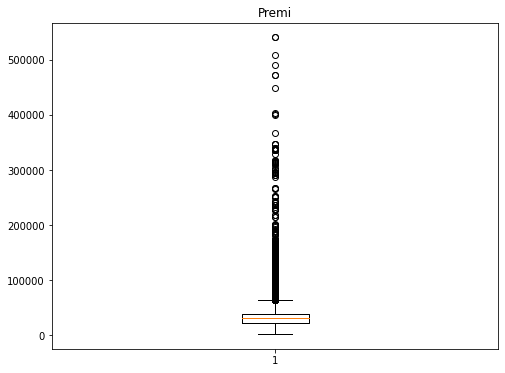

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.boxplot(df["Premi"])
plt.title("Premi")

plt.show()

Dari boxplot diatas, data "Premi" terdapat outlier sehingga kita perlu menghapus data outlier tersebut

In [18]:
def hapus_outlier(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    UPPER = Q3 + 1.5*IQR
    LOWER = Q1 - 1.5*IQR

    df = df[(df["Premi"] >= LOWER) & (df["Premi"] <= UPPER)]
    
    return df

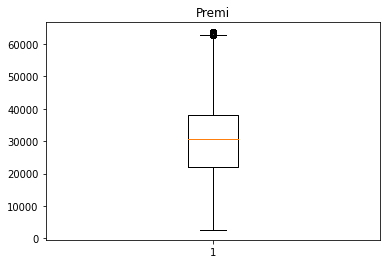

In [19]:
df = hapus_outlier(df,"Premi")

plt.boxplot(df["Premi"])
plt.title("Premi")

plt.show()

Seperti yang terlihat di boxplot, data outlier sudah hilang, namun masih ada beberapa data di dekat nilai upper

## **Mengubah Data Categorical Menjadi Numerik**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279588 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 279588 non-null  int64  
 1   Jenis_Kelamin      279588 non-null  object 
 2   Umur               279588 non-null  float64
 3   SIM                279588 non-null  float64
 4   Kode_Daerah        279588 non-null  float64
 5   Sudah_Asuransi     279588 non-null  float64
 6   Umur_Kendaraan     279588 non-null  object 
 7   Kendaraan_Rusak    279588 non-null  object 
 8   Premi              279588 non-null  float64
 9   Kanal_Penjualan    279588 non-null  float64
 10  Lama_Berlangganan  279588 non-null  float64
 11  Tertarik           279588 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 27.7+ MB


Dari data diatas terlihat masih ada data yang bertipe object sehingga kita perlu mengubah data tersebut menjadi data numerik agar data bisa diproses <br><br>
Disini kita menggunakan metode Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

def ubah_ke_numerik(df,columns=[]):
    encode = LabelEncoder()
    for col in columns:
        df[col] = encode.fit_transform(df[col])
    return df

In [22]:
columns = ["Jenis_Kelamin","Umur_Kendaraan","Kendaraan_Rusak"]
df = ubah_ke_numerik(df,columns=columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279588 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 279588 non-null  int64  
 1   Jenis_Kelamin      279588 non-null  int64  
 2   Umur               279588 non-null  float64
 3   SIM                279588 non-null  float64
 4   Kode_Daerah        279588 non-null  float64
 5   Sudah_Asuransi     279588 non-null  float64
 6   Umur_Kendaraan     279588 non-null  int64  
 7   Kendaraan_Rusak    279588 non-null  int64  
 8   Premi              279588 non-null  float64
 9   Kanal_Penjualan    279588 non-null  float64
 10  Lama_Berlangganan  279588 non-null  float64
 11  Tertarik           279588 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 27.7 MB


## **Seleksi Fitur**

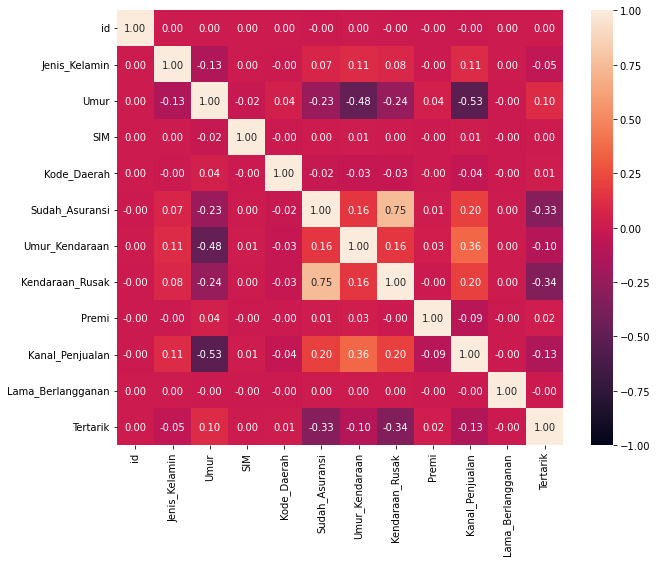

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() ,vmin=-1,vmax=1,annot=True, fmt=".2f")
plt.show()

Dari heatmap diatas, kita akan memilih kolom "Sudah_Asuransi" dan "Kendaraan_Rusak",serta  "Umur" dan "Kanal_Penjualan" karena memiliki korelasi yang cukup besar.

In [25]:
selected_columns = ["Sudah_Asuransi","Kendaraan_Rusak","Umur","Kanal_Penjualan"]
train = df[selected_columns]
label = df["Tertarik"]

# **Clustering**

## **Implementasi K-Means**

In [26]:
from collections import defaultdict
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

In [27]:
def kmeans(train,k=2,iteration=100):
    #Mengubah data train menjadi array
    train = np.array(train)

    #untuk mengurangi kemungkinan nilai centroid sama
    #maka centroid akan dipilih dari data train yang unik
    unique_train = np.unique(train,axis=0)
    
    #Inisiasi centroid awal dengan mengambil titik secara acak
    #pada data train yang unik sejumlah k atau cluster yang diinginkan
    centroid = np.array(random.choices(unique_train,k=k))

    #Jumlah fitur data
    features = train.shape[1]

    #Melakukan iterasi
    for i in range(iteration):
        
        #Menghitung nilai jarak antara data train dengan centroid
        distance = []
        for j in range(k):
            euclid = np.linalg.norm(train-centroid[j,:],axis=1)
            distance.append(euclid)
        
        #Menentukan cluster dari data berdasarkan jarak terpendek
        #dari data train diantara cluster
        min_dist = np.argmin(distance,axis=0)
        
        #Melakukan grouping dengan memasukkan data train ke dalam cluster
        #yang memiliki jarak terpendek antara data train dengan centroid
        group = defaultdict(list)
        for idx,cluster in enumerate(min_dist):
            group[cluster].append(train[idx])
        
        #Menentukan titik centroid baru dengan menghitung nilai mean
        #dari data train yang berada dalam group cluster
        new_centroid = []
        for j in range(k):
            mean = np.mean(group[j],axis=0)
            
            #Karena ada kemungkinan cluster tidak memiliki anggota
            #maka kita perlu mengecek apakah mean bernilai nan atau kosong
            #jika mean bernilai nan maka kita menggantinya dengan array
            #yang bernilai nan sebanyak jumlah fitur
            if np.all(np.isnan(mean)):
                mean = np.full((features,),np.nan)
            new_centroid.append(mean)
        
        new_centroid = np.array(new_centroid)
        
        #Mengecek apakah centroid saat ini sama dengan centroid baru
        #jika ternyata benar maka kita dapat menghentikan iterasi
        if (np.all(centroid == new_centroid)):
            break

        #Memasukkan nilai centroid baru ke centroid saat ini
        #yang nilai centroid barunya tidak nan atau kosong
        for idx in np.argwhere(~np.isnan(new_centroid)):
            centroid[idx[0],idx[1]] = new_centroid[idx[0],idx[1]]
                
        
    return centroid

## **Clustering Data Train**

In [28]:
label.unique()

array([0, 1])

Karena pada dataset kita telah ada label, maka kita akan memanfaatkan label tersebut. Seperti yang terlihat bahwa hanya ada 2 nilai pada label sehingga kita akan menggunakan k=2 pada kmeans

In [29]:
centroid = kmeans(train,k=2)
centroid

array([[  0.4837074 ,   0.56994627,  34.01651067, 144.63599373],
       [  0.29910481,   0.37868471,  49.69738493,  25.4496088 ]])

## **Evaluasi Clustering**

Untuk evaluasi clustering ini, apakah jumlah cluster sudah tepat atau belum, kita akan menggunakan Elbow Method

In [30]:
def wcss(data,centroid,k=2):
    distance = []
    for i in range(k):
        euclid = np.linalg.norm(data-centroid[i,:],axis=1)
        distance.append(euclid)
    min_dist = np.argmin(distance,axis=0)
    
    wcss_value = 0
    for i,j in enumerate(min_dist):
        wcss_value += distance[j][i]**2
    return wcss_value

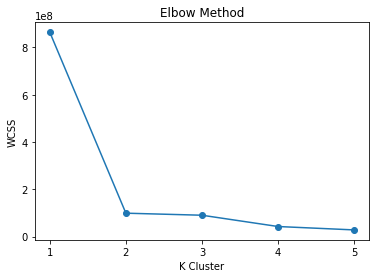

In [31]:
list_wcss = []
for i in range(1,6):
    c = kmeans(train,k=i)
    list_wcss.append(wcss(train,c,k=i))

plt.plot(range(1,6),list_wcss)
plt.scatter(range(1,6),list_wcss)
plt.xticks(range(1,6))
plt.xlabel("K Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Seperti yang terliihat di grafik, setelah nilai k=2, titik mulai melandai sehingga nilai cluster terbaik adalah 2

## **Prediksi Data Test**

### **Memuat Dataset Test**

In [32]:
df_test = pd.read_csv("https://github.com/helmy-faishal/tugas-clustering/blob/main/kendaraan_test.csv?raw=true")
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


### **Pra-pemrosesan Data Test**

In [33]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [34]:
columns = ["Jenis_Kelamin","Umur_Kendaraan","Kendaraan_Rusak"]
df_test = ubah_ke_numerik(df_test,columns=columns)

In [35]:
data_test = df_test[selected_columns]

### **Melakukan Prediksi Data Test**

In [36]:
def predict(data,centroid):
    k = centroid.shape[0]
    distance = []
    for i in range(k):
        euclid = np.linalg.norm(data-centroid[i,:],axis=1)
        distance.append(euclid)
    return np.argmin(distance,axis=0)

In [37]:
pred_test = predict(data_test,centroid)

In [38]:
from collections import Counter

Counter(pred_test)

Counter({0: 34839, 1: 12800})